# Machine Learning Basics


## Learning Objectives:
1. Be able to apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
2. Understand the bias-variance tradeoff and how adjusting model flexibility impacts model selection and the training process

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

**(a)** The sample size $n$ is extremely large, and the number of predictors $p$ is small.

**(b)** The number of predictors $p$ is extremely large, and the number of observations $n$ is small.

**(c)** The relationship between the predictors and response is highly non-linear.

**(d)** The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**  
(a) **Flexible** is better because large sample size reduce the likelihood of overfitting.  
(b) **Inflexible** is better. With small number of observations we want to avoid overfit.  
(c) **Flexible** is better to capture the non-linear relationship.  
(d) **Inflexible** is better, because flexible models will try to capture the noise in the data here.

## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**  
(a) **regression**. **inference**. n=500, p=3  
(b) **classification**. **prediction**. n=20, p=13  
(c) **regression**. **prediction**. n=52, p=3

# Practical Questions

## 3
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A1_X_train_low.csv`, which lets you know whether the file contains features, $X$, or targets, $y$; training or testing data; and is from the low or high dimensional dataset.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

**ANSWER**:

In [1]:
# (a) Write your own kNN classifier
import numpy as np
from collections import Counter
class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        pass
    
    def fit(self, x, y):
        # Save the training data to properties of this class
        self.x=x
        self.y=y
        return self
        
    def predict(self, x, k):
        #x is a n x p testing matrix/df
        y_hat = [] # Variable to store the estimated class label for 
        # Calculate the distance from each vector in x to the training data
        for i in range(len(x)):
            x_tile=np.tile(x.iloc[i,], (len(self.x), 1)) #reshape to same num of col as training
            #dist is array same len of train x
            dist = np.sqrt(np.sum(np.square(x_tile - self.x), axis=1))  #sum row-wise

            #get the index of k smallest dist
            idx_nearest = np.argsort(dist)[:k]
            
            #find corresponding y
            nearest_y = self.y.iloc[idx_nearest]
            
            #find most common y label
            most_common = Counter(list(nearest_y.T.values[0])).most_common(1)[0][0]
            y_hat.append(most_common)
            
        return np.array(y_hat)

# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = np.sum(np.array(y_hat.reshape(nvalues,1))==y) / nvalues
    return accuracy[0]

(b)

In [2]:
# Evaluate the performance of your kNN classifier on a low- and a high-dimensional dataset 
#   and time the predictions of each
import os
import pandas as pd
#arr = os.listdir('../ids705/assignments/Data')
path='../ids705/assignments/Data/'
#path=""
X_test_high=pd.read_csv(path+'A2_X_test_high.csv', header=None)
X_test_low=pd.read_csv(path+'A2_X_test_low.csv', header=None)
X_train_high=pd.read_csv(path+'A2_X_train_high.csv', header=None)
X_train_low=pd.read_csv(path+'A2_X_train_low.csv', header=None)
y_test_high=pd.read_csv(path+'A2_y_test_high.csv', header=None)
y_test_low=pd.read_csv(path+'A2_y_test_low.csv', header=None)
y_train_high=pd.read_csv(path+'A2_y_train_high.csv', header=None)
y_train_low=pd.read_csv(path+'A2_y_train_low.csv', header=None)

(c)

In [3]:
# train on low dimension set
import time
t_low=time.time()
clf_low = Knn().fit(X_train_low, y_train_low)
y_hat_low = clf_low.predict(X_test_low, k=5)
accuracy_l=accuracy(y_test_low, y_hat_low)
duration_low=time.time()-t_low
print('Time it takes for is %2f' % duration_low)

Time it takes for is 2.637398


In [4]:
# train on high dimension set
t_high=time.time()
clf_high = Knn().fit(X_train_high, y_train_high)
y_hat_high = clf_high.predict(X_test_high, k=5)
accuracy_h=accuracy(y_test_high, y_hat_high)
duration_high=time.time()-t_high
print('Time it takes for low dimension data is %2f' %duration_high)

Time it takes for low dimension data is 3.126321


In [5]:
print('accuracy for low dimension data is %2f' %accuracy_l)
print('accuracy for high dimension data is %2f' %accuracy_h)

accuracy for low dimension data is 0.925000
accuracy for high dimension data is 0.993000


(d)  

In [6]:
#use sklearn on low dimension set
import time
k_t_low=time.time()

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k_low = KNeighborsClassifier(n_neighbors=5)
clf_low=k_low.fit(X_train_low, y_train_low)
k_y_hat_low = clf_low.predict(X_test_low)
k_accuracy_l = accuracy_score(y_test_low, k_y_hat_low)

k_duration_low=time.time()-k_t_low
k_duration_low

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.8572299480438232

In [7]:
#use sklearn on high dimension set
import time
k_t_high=time.time()

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k_high = KNeighborsClassifier(n_neighbors=5)
clf_high=k_high.fit(X_train_high, y_train_high)
k_y_hat_high = clf_high.predict(X_test_high)
k_accuracy_h = accuracy_score(y_test_high, k_y_hat_high)

k_duration_high=time.time()-k_t_high
k_duration_high

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.16672301292419434

In [8]:
times_low=duration_low/k_duration_low
print("sklearn implementation for low dimension data is %f times faster than the DIY one" %times_low)
times_high=duration_high/k_duration_high
print("sklearn implementation for high dimension data is %f times faster than the DIY one" %times_high)

sklearn implementation for low dimension data is 3.076652 times faster than the DIY one
sklearn implementation for high dimension data is 18.751586 times faster than the DIY one


In [9]:
print('accuracy for sklearn implementation for low dimension data is %2f' %k_accuracy_l)
print('accuracy for sklearn implementation for high dimension data is %2f' %k_accuracy_h)

accuracy for sklearn implementation for low dimension data is 0.925000
accuracy for sklearn implementation for high dimension data is 0.993000


In [10]:
#df_accuracy_low=k_accuracy_l-
print("sklearn implementation for low dimension data is %.2f times faster than the DIY one" %times_low)
df_accuracy_high=duration_high/k_duration_high
print("sklearn implementation for high dimension data is %.2f times faster than the DIY one" %times_high)
print("sklearn implementation for both data has same accuracy as the DIY knn class")

sklearn implementation for low dimension data is 3.08 times faster than the DIY one
sklearn implementation for high dimension data is 18.75 times faster than the DIY one
sklearn implementation for both data has same accuracy as the DIY knn class


(e)  
Drawbacks include that it prevents real-time prediction and affects speed-to-decision.

## 4
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |


We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In [11]:
import numpy as np

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])

**ANSWER**:

(a)  
*Euclidean distance between obs and the test point*

| Obs. | test  |
|------|-------|
| **1**| 3.00    |
| **2**| 2.00     |
| **3**| 3.16     | 
| **4**| 2.24    |
| **5**| 1.41   | 
| **6**| 1.73     | 



In [12]:
t=np.array([[0,0,0]])
for i in range(len(X)):
    dist = np.sqrt(np.sum(np.square(X[i] - t)))
    print(f'{dist:.2f}')

3.00
2.00
3.16
2.24
1.41
1.73


(b)  
Our prediction is blue.  
This is because the nearest 1 observation is 5 which is blue.

In [13]:
from sklearn.neighbors import KNeighborsClassifier
k1 = KNeighborsClassifier(n_neighbors=1)
clf1=k1.fit(X,y)
clf1.predict(t)

array(['b'],
      dtype='<U1')

(c)  
Our prediction is red.  
This is because observation 2,5,7 are nearest and they're red blue red respectively, with the majority being red.

(d)
We would expect the best value for k to be small for increased variance it would need to model the data

## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifier with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

**ANSWER**  
(a)  

In [14]:
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
plt.style.use('fivethirtyeight')

np.random.seed(1)
# generate 2d classification dataset
X_train, y_train = make_moons(n_samples=1000, noise=0.35)

(b)

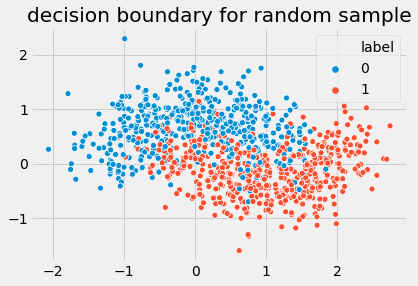

In [15]:
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X_train[:,0], y=X_train[:,1], label=y_train))
sns.scatterplot(x=X_train[:,0], y=X_train[:,1], hue="label",data=df)
plt.title('decision boundary for random sample')

(c)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
#make 3 classifiers
k1 = KNeighborsClassifier(n_neighbors=1)
k25 = KNeighborsClassifier(n_neighbors=25)
k50 = KNeighborsClassifier(n_neighbors=50)

#make 3 sample datasets
s1=df.sample(n=100)
s2=df.sample(n=100)
s3=df.sample(n=100)

#for applying 3 classifiers on 3 datasets, pls refer to step (d) to avoid duplicate code.

(d)

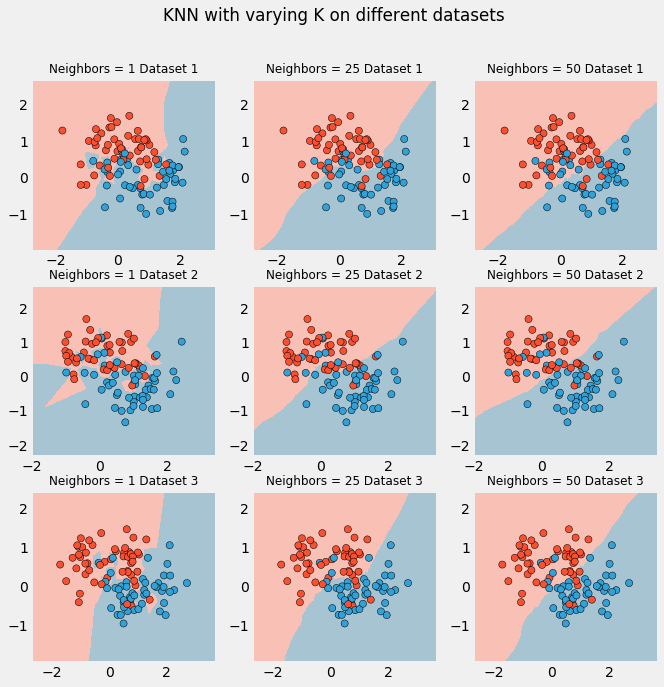

In [17]:
#new
dsets = [s1, s2, s3]
dsets_name = ['s1', 's2', 's3']
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
n=0
for ds in dsets:
    for i in [1, 25, 50]:
        n+=1
        X_mat = np.array(ds.iloc[:,:-1])
        y_mat = np.array(ds.iloc[:,-1])

        # Create color maps
        cm = ListedColormap(['#fc4f30', '#30a2da'])
        cm_bright = ListedColormap(['#f9c0b6',  '#a7c4d3'])

        

        clf = KNeighborsClassifier(i)
        clf.fit(X_mat, y_mat)


        # step size in the mesh
        mesh_step_size = .01  
        plot_symbol_size = 50

        # Plot the decision boundary 
        x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
        y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                             np.arange(y_min, y_max, mesh_step_size))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.subplot('33'+str(n))
        plt.pcolormesh(xx, yy, Z, cmap=cm_bright)

        # Plot training points
        plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y_mat, cmap=cm, edgecolor = 'black')
        plt.title("Neighbors = %s Dataset %s" %(i, ((n-1)//3)+1), fontsize=12)
fig.suptitle("KNN with varying K on different datasets")


(e)  
K=25 appear to best separate the decision boundary. K=1 vary the most as data change

(f)  
When k is very small, variance is large and the classifier overfits.  
When k is very large, bias is large and the overly simplified classfier underfits.

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...,500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

(a)

In [18]:
X_test, y_test = make_moons(n_samples=1000, noise=0.35, random_state=100)

(b)

In [19]:
from sklearn.metrics import zero_one_loss
error_rate=[]
for i in range(1,501):
    k=KNeighborsClassifier(n_neighbors=i)
    clf = k.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    error_rate.append(zero_one_loss(y_test, y_pred, normalize=True))

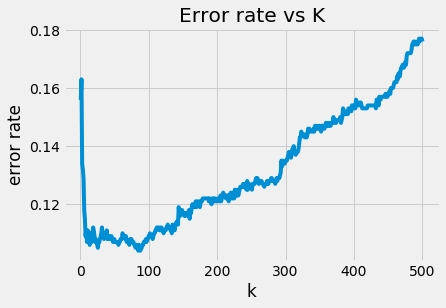

In [20]:
g=sns.lineplot(x=range(1,501),y=error_rate)
g.set(xlabel='k', ylabel='error rate', title='Error rate vs K')

(c) 

The trend indicates error rate goes down when $K$ increases initially, then go up again as the bias increases and the flexible decreases.

(d)  
Lower $K$ represent high variance and higher $K$ represent high bias.

(e)  
The optimal value of K is 84.

In [21]:
print(np.argmin(error_rate))
print(np.min(error_rate))

84
0.104


(f)  
Hyperparameters controls the flexibility of other models

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given a dataset below that is partitioned into a training and testing dataset. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** A linear model does not mean that non-linear relationships cannot be explored. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

In [22]:
x_train = [3.19,9.26,9.38,8.77,7.91,3.79,3.18,7.61,2.36,6.26,6.62,1.53,6.25,7.93,7.07,4.58,4.14,2.14,9.04,4.56,3.99,6.71,2.51,0.84,6.13,5.22,0.25,3.60,1.36,5.59,4.81,1.14,0.36,2.31,1.37,5.86,4.23,9.48,2.26,0.77,4.33]
y_train = [46.40,172.16,209.00,203.31,82.88,62.57,14.38,177.00,8.01,82.35,84.84,-5.59,54.96,167.17,83.09,-21.63,94.64,63.97,106.57,38.99,88.26,66.99,-11.12,-0.44,65.08,61.47,-0.61,23.85,10.55,83.69,54.35,51.82,-18.63,1.98,4.90,55.44,50.09,155.66,45.57,18.12,30.58]

x_test = [5.65,0.07,8.84,5.14,6.65,1.35,5.45,7.39,3.35]
y_test = [98.52,16.09,198.45,75.90,85.11,47.64,14.76,141.03,-39.13]

**ANSWER**

(a)

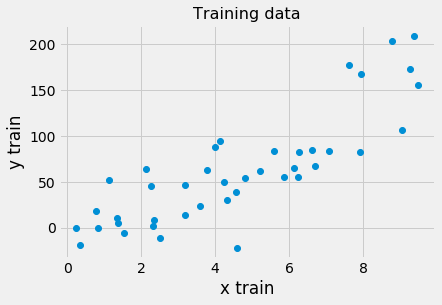

In [23]:
plt.plot(x_train,y_train,'o')
plt.title('Training data', fontsize=16)
plt.xlabel('x train')
plt.ylabel('y train')

(b)  

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np

arrayit=lambda x: np.array(x).reshape(-1,1)
x_train, y_train,x_test,y_test=arrayit(x_train),arrayit(y_train),arrayit(x_test),arrayit(y_test)

lr = LinearRegression().fit(x_train, y_train)
y_pred=lr.predict(x_train)
r_squared=r2_score(y_train,y_pred)
print("The coef is: %.2f" % lr.coef_)
print("The intercept is: %.2f" % lr.intercept_)
print("R squared is: %.2f" % r_squared)
print("Mean squared error is: %.2f" % mean_squared_error(y_train,y_pred))

The coef is: 18.30
The intercept is: -21.73
R squared is: 0.70
Mean squared error is: 1052.59


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


The equation with estimated coefficients is $y = -21.7 + 18.3 x$

(c)

In [25]:
from sklearn.preprocessing import PolynomialFeatures
#add square term to x
poly = PolynomialFeatures(2)
x_train_poly=poly.fit_transform(x_train)
lr_poly = LinearRegression().fit(x_train_poly, y_train)
y_pred=lr_poly.predict(x_train_poly)
r_squared_poly=r2_score(y_train,y_pred)

print("The coef is: %s" % lr_poly.coef_)
print("The intercept is: %.2f" % lr_poly.intercept_)
print("R squared is: %.2f" % r_squared_poly)
print("Mean squared error is: %.2f" % mean_squared_error(y_train,y_pred))

The coef is: [[ 0.          0.47100686  1.83208191]]
The intercept is: 8.01
R squared is: 0.75
Mean squared error is: 884.80


The equation with estimated coefficients is $y = 8 + 0.47 x + 1.83 x^2$

(d)

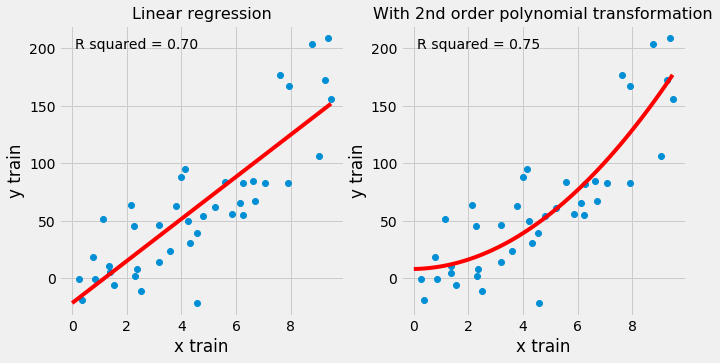

In [26]:
xf=np.linspace(0,np.max(x_train),100)
yf = -21.7 + 18.3*xf
yf_poly= 8 + 0.47*xf + 1.83 * xf**2

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(x_train,y_train,'o')
plt.plot(xf,yf,'r')
plt.title('Linear regression', fontsize=16)
plt.text(0.1,200, "R squared = %.2f" % r_squared)
plt.xlabel('x train')
plt.ylabel('y train')

plt.subplot(1, 2, 2)
plt.plot(x_train,y_train,'o')
plt.plot(xf,yf_poly,'r')
plt.title('With 2nd order polynomial transformation', fontsize=16)
plt.text(0.1,200, "R squared = %.2f" % r_squared_poly)
plt.xlabel('x train')
plt.ylabel('y train')

(e)

In [27]:
# on testing data
yt_pred=lr.predict(x_test)
print("R squared is: %s" % r2_score(y_test,yt_pred))
print("Mean squared error is: %s" % mean_squared_error(y_test,yt_pred))

x_test_poly=poly.fit_transform(x_test)
yt_pred_poly=lr_poly.predict(x_test_poly)
print("With polynomial transform R squared is: %s" % r2_score(y_test,yt_pred_poly))
print("With polynomial transform Mean squared error is: %s" % mean_squared_error(y_test,yt_pred_poly))

R squared is: 0.555646588579
Mean squared error is: 2023.31210889
With polynomial transform R squared is: 0.692782008956
With polynomial transform Mean squared error is: 1398.88175801


(f)  
The model with polynomial feature performs better on both training and testing set in terms of R squared, because it models the relation between x and y better.

(g)  
If training and testing data significantly differ, it will reduce the predictability as the pattern extracted from training no longer applies to testing.